In [1]:
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()

In [2]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [103]:
lm_df = pd.read_csv('test.csv',index_col=0)
lm_df = lm_df.loc[lm_df.label == 1]
lm_df1 = lm_df.drop('label',axis=1)
lm_df1 = lm_df1.drop('고객번호',axis=1)
col_list = lm_df1.columns
for col in col_list:
    lm_df1[col] = np.where(lm_df1[col]<0,-lm_df1[col],lm_df1[col])
lm_df1

,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,A_구매지수,B_구매지수,C_구매지수,D_구매지수,가공식품_구매지수,...,교육/문화용품_구매지수,가구/인테리어_구매지수,시설_구매지수,의약품/의료기기_구매지수,총구매횟수변동,성별,연령대,거주지역,RECENCY,성장률
0,0.6,0.0,2.4,9.0,0.0,0.6,1.4,0.0,0.0,0.6,...,0.0,1.0,0.0,10.0,7,1,9,9,4,10.0
1,0.0,0.0,0.6,9.0,0.0,0.0,1.0,0.0,10.0,3.6,...,0.0,0.0,0.0,0.0,5,1,9,2,7,14.0
2,0.0,1.2,0.6,0.0,0.0,1.8,0.8,0.0,0.0,0.6,...,0.0,0.0,0.0,0.0,5,1,9,9,2,30.0
3,1.2,0.6,0.2,0.0,0.0,0.0,1.0,0.6,0.0,1.6,...,0.0,0.6,0.0,6.0,5,0,9,9,1,27.0
4,2.0,0.4,4.2,4.8,0.0,0.6,1.8,0.0,10.0,0.6,...,0.0,1.8,0.0,9.0,5,1,9,2,41,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,2.0,4.0,3.0,0.0,0.0,5.0,4.0,7.0,10.0,1.0,...,0.0,0.0,0.0,10.0,10,0,1,9,1,0.0
19368,1.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,10.0,1.0,...,2.0,0.0,0.0,9.0,8,0,1,9,1,0.0
19369,3.0,4.0,6.0,0.0,0.0,4.0,8.0,0.0,0.0,5.0,...,5.0,7.0,0.0,0.0,10,0,5,8,2,0.0
19370,2.0,2.0,3.0,0.0,0.0,4.0,7.0,0.0,0.0,4.0,...,6.0,5.0,0.0,0.0,10,0,6,8,1,0.0


In [104]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [105]:
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*','d','p','h']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

for col in col_list:
    lm_df1[col] = np.log1p(lm_df1[col])

X_scaled = StandardScaler().fit_transform(lm_df1)
kmeans = KMeans(n_clusters = 3,random_state=0)
labels = kmeans.fit_predict(X_scaled)
lm_df['cluster_label'] = labels

print(silhouette_score(X_scaled,labels))

0.05239203978777519


C:\Users\Master\AppData\Local\Temp\ipykernel_9424\1106714428.py:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\Master\AppData\Local\Temp\ipykernel_9424\1106714428.py:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


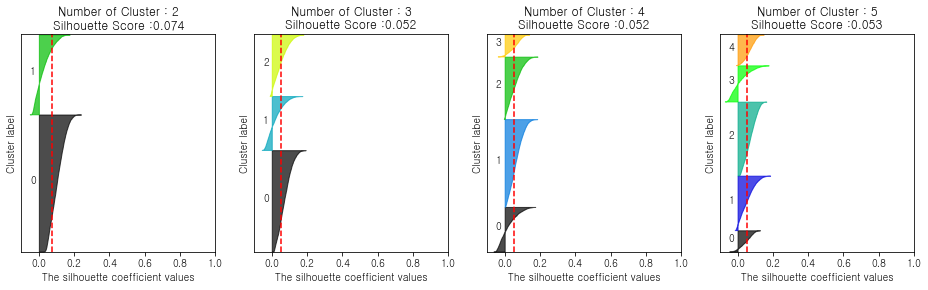

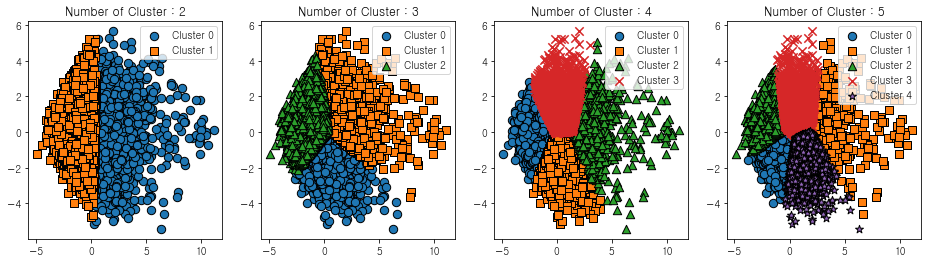

In [107]:
visualize_silhouette([2,3,4,5],X_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_scaled)

In [108]:
lm_df

,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,A_구매지수,B_구매지수,C_구매지수,D_구매지수,...,시설_구매지수,의약품/의료기기_구매지수,총구매횟수변동,성별,연령대,거주지역,RECENCY,성장률,label,cluster_label
0,1,-0.6,0.0,2.4,9.0,0.0,-0.6,1.4,0.0,0.0,...,0.0,10.0,7,1,9,9,4,-10.0,1,0
1,2,0.0,0.0,-0.6,9.0,0.0,0.0,1.0,0.0,10.0,...,0.0,0.0,5,1,9,2,7,14.0,1,0
2,3,0.0,-1.2,-0.6,0.0,0.0,-1.8,0.8,0.0,0.0,...,0.0,0.0,5,1,9,9,2,-30.0,1,2
3,4,-1.2,-0.6,0.2,0.0,0.0,0.0,1.0,-0.6,0.0,...,0.0,-6.0,5,0,9,9,1,-27.0,1,0
4,5,-2.0,0.4,-4.2,-4.8,0.0,-0.6,-1.8,0.0,10.0,...,0.0,9.0,5,1,9,2,41,-46.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19379,2.0,4.0,3.0,0.0,0.0,5.0,4.0,7.0,10.0,...,0.0,10.0,10,0,1,9,1,0.0,1,1
19368,19380,1.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,10.0,...,0.0,9.0,8,0,1,9,1,0.0,1,0
19369,19381,3.0,4.0,6.0,0.0,0.0,4.0,8.0,0.0,0.0,...,0.0,0.0,10,0,5,8,2,0.0,1,1
19370,19382,2.0,2.0,3.0,0.0,0.0,4.0,7.0,0.0,0.0,...,0.0,0.0,10,0,6,8,1,0.0,1,1


In [109]:
c0 =  list(lm_df.loc[lm_df['cluster_label'] == 0,'고객번호'])
c1 =  list(lm_df.loc[lm_df['cluster_label'] == 1,'고객번호'])
c2 =  list(lm_df.loc[lm_df['cluster_label'] == 2,'고객번호'])

In [126]:
c0

[1,
 2,
 4,
 11,
 14,
 15,
 19,
 26,
 29,
 33,
 39,
 41,
 43,
 47,
 50,
 54,
 59,
 62,
 64,
 66,
 68,
 73,
 75,
 76,
 79,
 91,
 95,
 97,
 101,
 102,
 110,
 113,
 114,
 119,
 120,
 123,
 124,
 125,
 127,
 130,
 131,
 140,
 146,
 147,
 150,
 151,
 156,
 160,
 161,
 162,
 172,
 177,
 178,
 179,
 183,
 186,
 190,
 194,
 196,
 201,
 204,
 208,
 209,
 212,
 216,
 227,
 229,
 238,
 239,
 247,
 249,
 250,
 251,
 254,
 255,
 257,
 262,
 263,
 265,
 266,
 267,
 268,
 275,
 277,
 279,
 283,
 286,
 288,
 289,
 296,
 302,
 307,
 309,
 310,
 311,
 313,
 318,
 321,
 323,
 327,
 331,
 332,
 336,
 338,
 339,
 340,
 342,
 343,
 345,
 347,
 349,
 351,
 359,
 363,
 367,
 369,
 374,
 375,
 377,
 388,
 389,
 393,
 399,
 400,
 401,
 407,
 408,
 409,
 414,
 416,
 417,
 419,
 421,
 422,
 425,
 432,
 435,
 440,
 451,
 455,
 457,
 459,
 460,
 464,
 465,
 467,
 468,
 470,
 475,
 478,
 479,
 481,
 483,
 486,
 497,
 500,
 501,
 502,
 504,
 505,
 507,
 508,
 509,
 510,
 511,
 515,
 516,
 518,
 521,
 524,
 529,
 536,

In [127]:
c1

[5,
 9,
 17,
 18,
 34,
 46,
 51,
 52,
 53,
 56,
 57,
 61,
 65,
 74,
 84,
 87,
 89,
 98,
 100,
 109,
 135,
 138,
 152,
 164,
 184,
 187,
 219,
 230,
 253,
 260,
 261,
 273,
 280,
 299,
 301,
 308,
 312,
 319,
 320,
 325,
 326,
 344,
 355,
 364,
 365,
 371,
 381,
 382,
 391,
 394,
 405,
 411,
 412,
 423,
 429,
 433,
 448,
 453,
 462,
 489,
 491,
 506,
 517,
 520,
 522,
 526,
 527,
 539,
 558,
 567,
 569,
 574,
 589,
 606,
 612,
 615,
 622,
 630,
 634,
 635,
 636,
 644,
 662,
 677,
 681,
 689,
 718,
 723,
 731,
 742,
 774,
 789,
 811,
 815,
 826,
 830,
 835,
 842,
 843,
 844,
 849,
 856,
 869,
 872,
 873,
 881,
 890,
 921,
 930,
 949,
 960,
 961,
 963,
 966,
 969,
 972,
 985,
 988,
 994,
 1004,
 1015,
 1022,
 1028,
 1038,
 1039,
 1042,
 1049,
 1054,
 1059,
 1095,
 1096,
 1101,
 1105,
 1117,
 1123,
 1129,
 1156,
 1180,
 1192,
 1219,
 1236,
 1239,
 1241,
 1243,
 1245,
 1254,
 1258,
 1274,
 1275,
 1291,
 1292,
 1302,
 1306,
 1319,
 1323,
 1327,
 1330,
 1331,
 1342,
 1350,
 1357,
 1358,
 1363

In [128]:
c2

[3,
 10,
 20,
 22,
 27,
 36,
 55,
 71,
 96,
 103,
 104,
 116,
 128,
 132,
 139,
 144,
 153,
 154,
 163,
 173,
 174,
 176,
 200,
 203,
 205,
 226,
 231,
 232,
 235,
 240,
 259,
 269,
 276,
 278,
 300,
 303,
 329,
 348,
 357,
 370,
 372,
 380,
 385,
 420,
 438,
 469,
 476,
 488,
 495,
 496,
 523,
 540,
 543,
 556,
 579,
 591,
 597,
 613,
 619,
 624,
 639,
 646,
 667,
 668,
 669,
 679,
 682,
 683,
 685,
 686,
 696,
 699,
 700,
 730,
 749,
 762,
 772,
 782,
 790,
 796,
 798,
 802,
 804,
 805,
 821,
 852,
 871,
 874,
 876,
 908,
 920,
 922,
 942,
 964,
 965,
 975,
 976,
 990,
 1003,
 1005,
 1006,
 1016,
 1017,
 1023,
 1034,
 1035,
 1037,
 1048,
 1050,
 1052,
 1064,
 1070,
 1079,
 1081,
 1089,
 1099,
 1106,
 1109,
 1113,
 1120,
 1122,
 1132,
 1140,
 1143,
 1148,
 1164,
 1182,
 1185,
 1187,
 1193,
 1202,
 1204,
 1205,
 1225,
 1228,
 1231,
 1237,
 1252,
 1262,
 1281,
 1293,
 1294,
 1321,
 1338,
 1354,
 1373,
 1383,
 1392,
 1399,
 1416,
 1428,
 1432,
 1435,
 1454,
 1463,
 1468,
 1483,
 1486,
 1

In [110]:
print(len(c0),len(c1),len(c2))

4841 2573 2926


In [111]:
c2_df = lm_df.loc[lm_df['cluster_label'] == 2]
c2_df

,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,A_구매지수,B_구매지수,C_구매지수,D_구매지수,...,시설_구매지수,의약품/의료기기_구매지수,총구매횟수변동,성별,연령대,거주지역,RECENCY,성장률,label,cluster_label
2,3,0.0,-1.2,-0.6,0.0,0.0,-1.8,0.8,0.0,0.0,...,0.0,0.0,5,1,9,9,2,-30.0,1,2
9,10,-0.2,1.8,-0.6,-5.4,0.0,0.4,3.0,0.0,10.0,...,0.0,0.0,5,0,9,9,4,3.0,1,2
19,20,0.4,1.2,0.0,0.0,0.0,0.4,2.0,6.0,0.0,...,0.0,0.0,5,1,9,9,1,3.0,1,2
21,22,0.0,-0.6,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6,0,9,0,2,-14.0,1,2
26,27,-0.2,-0.2,-0.6,3.0,0.0,-0.2,-2.4,-0.6,0.0,...,0.0,0.0,5,1,9,9,2,-34.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19332,19344,1.0,-0.6,0.0,0.0,0.0,1.0,-0.6,5.4,0.0,...,0.0,0.0,8,1,2,2,12,203.0,1,2
19334,19346,0.0,-0.2,-0.6,0.0,0.0,3.8,0.0,-2.4,0.0,...,0.0,0.0,5,0,7,9,16,-95.0,1,2
19342,19354,1.0,1.4,1.0,0.0,0.0,2.4,0.0,2.0,10.0,...,0.0,9.0,9,0,1,2,1,0.0,1,2
19358,19370,8.0,8.0,1.0,0.0,0.0,8.0,0.0,4.0,0.0,...,0.0,0.0,10,0,2,9,1,0.0,1,2


In [133]:
c2_df.고객번호.to_csv('c2.csv')

In [112]:
c2_df_d = c2_df.describe()

In [113]:
c2_df_d.iloc[:,1:10]

,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,A_구매지수,B_구매지수,C_구매지수,D_구매지수
count,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000
mean,-0.177444,0.267669,-0.197676,0.452768,0.351880,0.618455,0.214081,0.299453,0.424470
std,1.144224,1.729594,0.908005,2.657668,2.423855,2.224301,1.529272,1.892667,2.167421
min,-4.200000,-4.800000,-4.200000,-6.000000,-6.000000,-4.800000,-4.200000,-6.000000,-6.000000
25%,-0.800000,-1.200000,-0.600000,0.000000,0.000000,-1.200000,-0.600000,0.000000,0.000000
50%,-0.200000,0.400000,-0.200000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000
75%,0.400000,1.400000,0.400000,0.000000,0.000000,2.000000,0.800000,0.150000,0.000000
max,9.000000,9.000000,6.000000,10.000000,10.000000,10.000000,7.000000,9.000000,10.000000


In [114]:
c2_df_d.iloc[:,10:20]

,가공식품_구매지수,신선식품_구매지수,일상용품_구매지수,의류_구매지수,패션잡화_구매지수,전문스포츠/레저_구매지수,디지털/가전_구매지수,교육/문화용품_구매지수,가구/인테리어_구매지수,시설_구매지수
count,2926.000000,2926.000000,2926.000000,2926.000000,2926.0000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000
mean,-0.171634,-0.058647,0.063636,0.367464,0.6054,0.863841,-0.191934,0.622146,0.418592,0.279973
std,1.170779,0.948322,1.435895,1.978111,2.5476,3.067977,2.089961,2.697803,2.822897,2.774206
min,-4.800000,-4.800000,-5.400000,-5.400000,-6.0000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000
25%,-0.800000,-0.600000,-0.600000,-1.200000,-1.2000,-1.200000,-1.200000,-0.200000,-1.200000,0.000000
50%,-0.200000,0.000000,0.000000,0.400000,0.4000,0.400000,0.000000,0.000000,0.000000,0.000000
75%,0.400000,0.400000,0.800000,1.800000,2.0000,3.000000,1.000000,2.000000,2.000000,0.000000
max,5.400000,5.000000,9.000000,10.000000,10.0000,10.000000,10.000000,10.000000,10.000000,10.000000


In [115]:
c2_df_d.iloc[:,20:]

,의약품/의료기기_구매지수,총구매횟수변동,성별,연령대,거주지역,RECENCY,성장률,label,cluster_label
count,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.0,2926.0
mean,0.970540,5.884826,0.189337,5.591251,6.317498,3.559467,-2.507177,1.0,2.0
std,3.921994,1.418099,0.391843,1.776305,4.109112,18.249881,47.795345,0.0,0.0
min,-6.000000,5.000000,0.000000,0.000000,0.000000,1.000000,-99.000000,1.0,2.0
25%,0.000000,5.000000,0.000000,4.000000,2.000000,1.000000,-26.000000,1.0,2.0
50%,0.000000,5.000000,0.000000,6.000000,7.000000,1.000000,-7.000000,1.0,2.0
75%,0.400000,7.000000,0.000000,7.000000,9.000000,2.000000,12.000000,1.0,2.0
max,10.000000,10.000000,1.000000,9.000000,16.000000,466.000000,814.000000,1.0,2.0


In [116]:
c2_df.연령대.value_counts()

6    668
5    593
7    508
4    404
8    253
3    208
9    148
2     93
1     49
0      2
Name: 연령대, dtype: int64

In [117]:
c0_df = lm_df.loc[lm_df['cluster_label'] == 0]

In [118]:
c0_df_d = c0_df.describe()

In [119]:
c0_df_d.iloc[:,1:10]

,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,A_구매지수,B_구매지수,C_구매지수,D_구매지수
count,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000
mean,-0.136583,-0.035819,-0.106631,0.999959,0.733567,0.053171,0.188556,0.712911,0.758108
std,0.586306,0.600645,1.138946,3.784015,3.263869,0.916023,1.442149,2.851495,2.931651
min,-2.600000,-2.400000,-5.400000,-6.000000,-6.000000,-3.600000,-6.000000,-6.000000,-6.000000
25%,-0.600000,-0.600000,-0.600000,0.000000,0.000000,-0.600000,-0.600000,-0.200000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.200000,0.400000,0.400000,2.800000,0.000000,0.400000,0.400000,2.000000,0.000000
max,2.200000,2.400000,7.000000,10.000000,10.000000,5.000000,10.000000,9.000000,10.000000


In [120]:
c0_df_d.iloc[:,10:20]

,가공식품_구매지수,신선식품_구매지수,일상용품_구매지수,의류_구매지수,패션잡화_구매지수,전문스포츠/레저_구매지수,디지털/가전_구매지수,교육/문화용품_구매지수,가구/인테리어_구매지수,시설_구매지수
count,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000
mean,0.040942,0.038918,0.157240,0.045734,0.226895,0.377112,0.077835,0.561496,0.414419,0.489899
std,1.488380,1.194445,1.460736,0.802135,1.404878,2.055669,3.375964,2.737334,2.523037,3.068811
min,-5.400000,-4.800000,-5.000000,-3.600000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000
25%,-0.600000,-0.600000,-0.600000,-0.600000,-0.600000,-0.600000,-2.400000,-0.200000,-0.800000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.800000,1.000000,0.400000,1.000000,1.200000,2.000000,1.200000,1.400000,0.000000
max,7.400000,7.400000,9.000000,4.000000,7.800000,10.000000,10.000000,10.000000,10.000000,10.000000


In [121]:
c0_df_d.iloc[:,20:]

,의약품/의료기기_구매지수,총구매횟수변동,성별,연령대,거주지역,RECENCY,성장률,label,cluster_label
count,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.0,4841.0
mean,0.275439,5.797562,0.180128,5.831027,6.532121,4.826276,-7.172898,1.0,0.0
std,2.229463,1.310291,0.384334,1.792764,3.794495,23.613104,28.724246,0.0,0.0
min,-6.000000,5.000000,0.000000,0.000000,0.000000,1.000000,-99.000000,1.0,0.0
25%,0.000000,5.000000,0.000000,5.000000,2.000000,1.000000,-24.000000,1.0,0.0
50%,0.000000,5.000000,0.000000,6.000000,8.000000,2.000000,-8.000000,1.0,0.0
75%,0.000000,6.000000,0.000000,7.000000,9.000000,4.000000,6.000000,1.0,0.0
max,10.000000,10.000000,1.000000,9.000000,16.000000,544.000000,373.000000,1.0,0.0


In [122]:
c1_df = lm_df.loc[lm_df['cluster_label'] == 1]
c1_df_d = c1_df.describe()

In [123]:
c1_df_d.iloc[:,1:10]

,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,A_구매지수,B_구매지수,C_구매지수,D_구매지수
count,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000
mean,-0.320326,-0.041508,0.035989,0.837932,0.779091,0.171473,0.520560,0.946522,0.767198
std,2.026591,1.595265,2.970052,3.933055,3.386174,1.816011,2.247895,3.168655,2.911443
min,-5.400000,-5.400000,-5.400000,-6.000000,-6.000000,-5.400000,-5.400000,-5.400000,-6.000000
25%,-1.800000,-1.200000,-2.400000,0.000000,0.000000,-0.600000,-1.200000,-0.600000,0.000000
50%,-0.600000,-0.200000,-0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.800000,2.000000,3.000000,0.000000,1.000000,1.200000,2.400000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [124]:
c1_df_d.iloc[:,10:20]

,가공식품_구매지수,신선식품_구매지수,일상용품_구매지수,의류_구매지수,패션잡화_구매지수,전문스포츠/레저_구매지수,디지털/가전_구매지수,교육/문화용품_구매지수,가구/인테리어_구매지수,시설_구매지수
count,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000
mean,0.173572,0.183055,0.232958,0.068869,0.281073,0.491255,0.121492,0.817956,0.474932,0.560358
std,2.980630,2.553239,2.421541,1.720071,2.296709,2.791573,3.674534,3.100635,3.172316,3.319730
min,-5.400000,-6.000000,-5.400000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000
25%,-2.200000,-1.800000,-1.200000,-1.200000,-1.200000,-1.200000,-2.400000,-0.600000,-1.600000,0.000000
50%,-0.400000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.400000,1.000000,1.400000,2.000000,2.000000,2.000000,2.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [125]:
c1_df_d.iloc[:,20:]

,의약품/의료기기_구매지수,총구매횟수변동,성별,연령대,거주지역,RECENCY,성장률,label,cluster_label
count,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.0,2573.0
mean,0.442208,6.401866,0.187719,5.387097,6.555383,4.972406,-7.435678,1.0,1.0
std,2.499855,1.849559,0.390563,1.885779,3.867727,11.311939,84.980353,0.0,0.0
min,-6.000000,5.000000,0.000000,0.000000,0.000000,1.000000,-100.000000,1.0,1.0
25%,0.000000,5.000000,0.000000,4.000000,2.000000,1.000000,-51.000000,1.0,1.0
50%,0.000000,5.000000,0.000000,5.000000,8.000000,2.000000,-31.000000,1.0,1.0
75%,0.000000,8.000000,0.000000,7.000000,9.000000,4.000000,24.000000,1.0,1.0
max,10.000000,10.000000,1.000000,9.000000,16.000000,197.000000,2425.000000,1.0,1.0


In [130]:
cursor.execute("select column_name from user_tab_columns where table_name = 'PURCUST4'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)
cursor.execute("select * from purcust4")
x = cursor.fetchall()
df1 = pd.DataFrame(x,columns = col_list)
df1

['고객번호', '제휴사', '성별', '연령대', '구매금액', '거주지역', '분기', '반기', '공통분류', '주중_주말', '금액등급']


,고객번호,제휴사,성별,연령대,구매금액,거주지역,분기,반기,공통분류,주중_주말,금액등급
0,12231,B,F,45세~49세,5380,100,7,4,가공식품,주중,3
1,06422,B,F,40세~44세,6500,100,7,4,신선식품,주중,3
2,06422,B,F,40세~44세,2500,100,7,4,신선식품,주중,3
3,02041,B,F,50세~54세,6420,100,7,4,가공식품,주중,3
4,02041,B,F,50세~54세,4240,100,7,4,신선식품,주중,3
...,...,...,...,...,...,...,...,...,...,...,...
28593025,03711,B,M,45세~49세,7290,013,6,3,가공식품,주중,3
28593026,14869,B,F,45세~49세,700,500,5,3,일상용품,주중,3
28593027,11735,B,F,50세~54세,10900,340,3,2,의류,주말,3
28593028,01593,B,F,55세~59세,5500,460,5,3,가구/인테리어,주중,3


In [131]:
df1.고객번호 = df1.고객번호.astype(int)

In [134]:
c1_df.고객번호.to_csv('c1.csv')

In [135]:
c0_df.고객번호.to_csv('c0.csv')